In [118]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from dataclasses import dataclass
plt.rcParams.update({
    "text.usetex": True,
})


In [133]:
rank_a, rank_b = np.random.randint(1, 6, size=(2,))

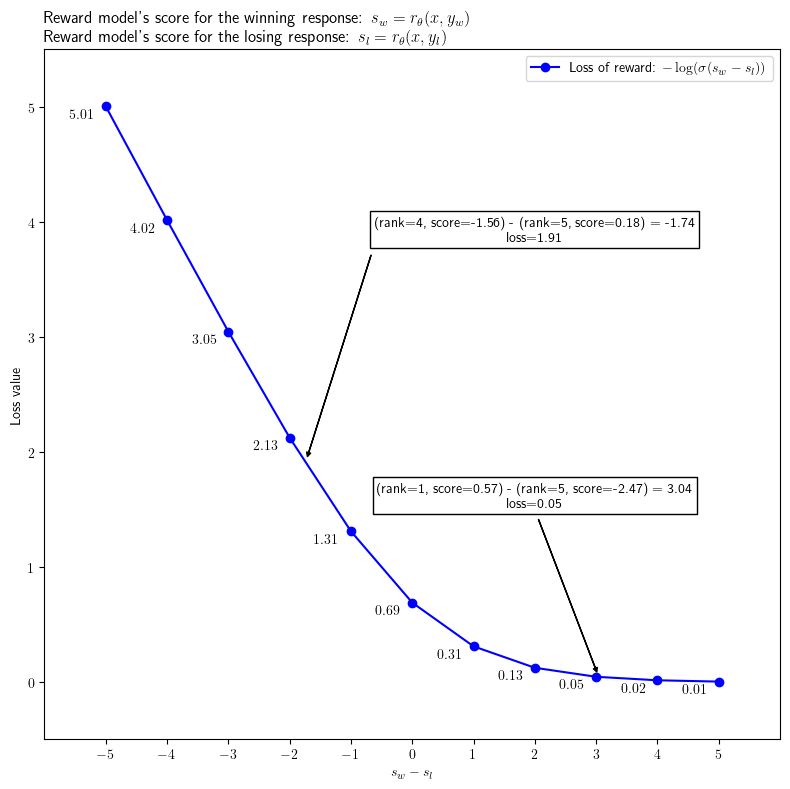

In [119]:
@dataclass
class Response:
    rank: int
    reward_score: float

    def __str__(self):
        return f"(rank={self.rank}, score={self.reward_score:.2f})"

@dataclass 
class Pair:
    response_a: Response
    response_b: Response

    def __str__(self):
        return f"{self.winning_response()} - {self.losing_response()} = {self.winning_score_minus_losing_score():.2f}"

    def winning_score_minus_losing_score(self):
        return (
            self.winning_response().reward_score 
            - self.losing_response().reward_score
        )

    def winning_response(self) -> Response:
        assert self.response_a.rank != self.response_b.rank
        # Smaller is better (1 is best, 5 is worst).
        return self.response_a if self.response_a.rank < self.response_b.rank else self.response_b

    def losing_response(self) -> Response:
        assert self.response_a.rank != self.response_b.rank
        # Smaller is better (1 is best, 5 is worst).
        return self.response_a if self.response_a.rank > self.response_b.rank else self.response_b

    @classmethod
    def from_random(cls):
        rank_a, rank_b = np.random.randint(1, 6, size=(2,))
        reward_a, reward_b = np.random.normal(size=(2,))
        return cls(
            response_a=Response(rank_a, reward_a),
            response_b=Response(rank_b, reward_b),
        )

    def annotate(self, loss, offset: float = 1.):
        d: float = self.winning_score_minus_losing_score()
        plt.annotate(
            f"{self}\nloss={loss(d):.2f}", 
            xy=(d, loss(d)),
            xytext=(offset * 2, np.maximum(1.5, loss(d) * 2)),
            arrowprops=dict(
                facecolor='black', 
                shrink=0.03, 
                width=0.1, 
                headwidth=3, 
                headlength=3,
                #connectionstyle="angle3",
            ),
            va="bottom",
            ha="center", 
            xycoords='data',
            bbox=dict(boxstyle="square", fc="w")
        )


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def loss(x):
    return -np.log(sigmoid(x))

np.random.seed(8)
plot_size: float = 8
xs: np.ndarray = np.linspace(-5, 5, 11)
ys: np.ndarray = loss(xs)
fig = plt.figure(figsize=(plot_size, plot_size))
plt.plot(xs, ys, "b-o", label="Loss of reward: $-\log(\sigma(s_w - s_l))$")
plt.legend(loc='best')
plt.xlabel("$s_w - s_l$")
plt.xticks(xs)
plt.ylabel("Loss value")
_ = plt.title(
    "\n".join([
        r"Reward model’s score for the winning response: $s_w=r_{ \theta }(x, y_w)$",
        r"Reward model’s score for the losing response: $s_l=r_{ \theta }(x, y_l)$",
    ]),
    loc='left'
)
offset: float = 0.1
for x, y in zip(xs, ys):
    plt.text(x - (offset * 2), y - offset, f"${y:.2f}$", horizontalalignment="right")
Pair.from_random().annotate(loss)
Pair.from_random().annotate(loss)
plt.margins(0.1, 0.1)
plt.tight_layout()
fig.savefig("reward_loss_with_examples.png", dpi=300)

In [121]:
np.log?

Call signature:  np.log(*args, **kwargs)
Type:            ufunc
String form:     <ufunc 'log'>
File:            ~/.pyenv/versions/3.11.2/lib/python3.11/site-packages/numpy/__init__.py
Docstring:      
log(x, /, out=None, *, where=True, casting='same_kind', order='K', dtype=None, subok=True[, signature, extobj])

Natural logarithm, element-wise.

The natural logarithm `log` is the inverse of the exponential function,
so that `log(exp(x)) = x`. The natural logarithm is logarithm in base
`e`.

Parameters
----------
x : array_like
    Input value.
out : ndarray, None, or tuple of ndarray and None, optional
    A location into which the result is stored. If provided, it must have
    a shape that the inputs broadcast to. If not provided or None,
    a freshly-allocated array is returned. A tuple (possible only as a
    keyword argument) must have length equal to the number of outputs.
where : array_like, optional
    This condition is broadcast over the input. At locations where the
    con